#使用KMeans进行聚类

In [1]:
from sklearn.cluster import KMeans

In [2]:
from sklearn import preprocessing

In [3]:
import pandas as pd
import numpy as np

#数据加载

In [15]:
data=pd.read_csv('D:\Anaconda3\source\car_data.csv',encoding='gbk')
train_x=data[["人均GDP","城镇人口比重","交通工具消费价格指数","百户拥有汽车量"]]
print(train_x)

    人均GDP  城镇人口比重  交通工具消费价格指数  百户拥有汽车量
0    8.05   86.20       95.92    37.71
1    8.34   80.50      103.57    20.62
2    3.39   45.60       99.03    23.32
3    3.13   49.68       98.96    18.60
4    5.79   56.62       99.11    19.62
5    5.07   64.05      100.12    11.15
6    3.84   53.40       97.15    11.24
7    3.28   56.50      100.54     5.29
8    8.18   89.30      101.58    18.15
9    6.22   61.90       98.95    23.92
10   5.92   62.30       96.69    33.85
11   2.56   44.80      100.25     9.20
12   4.72   58.10      100.75    17.83
13   2.61   45.70      100.91     8.88
14   4.71   50.95       98.50    28.12
15   2.87   40.57      100.59    14.06
16   3.41   51.83      101.15     9.69
17   2.98   45.10      100.02    12.82
18   5.07   66.50       97.55    30.71
19   2.52   41.80      102.28    17.24
20   2.88   50.50      102.26    15.82
21   3.43   55.02       99.12    10.44
22   2.61   41.83       99.76    12.52
23   1.64   34.96      100.71    10.48
24   1.92   36.80       9

# 规范化到 [0,1] 空间

In [16]:
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)
pd.DataFrame(train_x).to_csv('temp.csv',index=False)
print(train_x)

[[0.95671642 0.95344646 0.         1.        ]
 [1.         0.86784803 1.         0.47285626]
 [0.26119403 0.34374531 0.40653595 0.55613819]
 [0.22238806 0.40501577 0.39738562 0.41054904]
 [0.61940299 0.50923562 0.41699346 0.4420111 ]
 [0.5119403  0.62081394 0.54901961 0.18075262]
 [0.32835821 0.46088001 0.16078431 0.18352869]
 [0.24477612 0.50743355 0.60392157 0.        ]
 [0.9761194  1.         0.73986928 0.39666872]
 [0.68358209 0.58852681 0.39607843 0.57464528]
 [0.63880597 0.59453371 0.10065359 0.88093769]
 [0.13731343 0.33173149 0.56601307 0.12060457]
 [0.45970149 0.53146118 0.63137255 0.38679827]
 [0.14477612 0.34524703 0.65228758 0.11073411]
 [0.45820896 0.4240877  0.3372549  0.70419494]
 [0.18358209 0.26820844 0.61045752 0.27051203]
 [0.2641791  0.4373029  0.68366013 0.13571869]
 [0.2        0.33623667 0.53594771 0.23226403]
 [0.5119403  0.65760625 0.2130719  0.7840839 ]
 [0.13134328 0.28667968 0.83137255 0.36859963]
 [0.18507463 0.41732993 0.82875817 0.32479951]
 [0.26716418 

# K-Means 手肘法：统计不同K取值的误差平方和

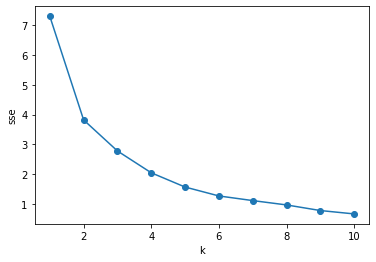

In [20]:
import matplotlib.pyplot as plt
sse=[]
for k in range(1,11):
    #kmeans算法
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(train_x)
    #计算inertia簇内误差平方和
    sse.append(kmeans.inertia_)
x=range(1,11)
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(x,sse,'o-')
plt.show()

### 使用KMeans聚类

In [23]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(train_x)
predict_y=kmeans.predict(train_x)
# 合并聚类结果，插入到原数据中
result=pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)
print(result)

     地区  人均GDP  城镇人口比重  交通工具消费价格指数  百户拥有汽车量  聚类结果
0    北京   8.05   86.20       95.92    37.71     0
1    天津   8.34   80.50      103.57    20.62     2
2    河北   3.39   45.60       99.03    23.32     3
3    山西   3.13   49.68       98.96    18.60     3
4   内蒙古   5.79   56.62       99.11    19.62     0
5    辽宁   5.07   64.05      100.12    11.15     1
6    吉林   3.84   53.40       97.15    11.24     3
7   黑龙江   3.28   56.50      100.54     5.29     1
8    上海   8.18   89.30      101.58    18.15     2
9    江苏   6.22   61.90       98.95    23.92     0
10   浙江   5.92   62.30       96.69    33.85     0
11   安徽   2.56   44.80      100.25     9.20     1
12   福建   4.72   58.10      100.75    17.83     1
13   江西   2.61   45.70      100.91     8.88     1
14   山东   4.71   50.95       98.50    28.12     0
15   河南   2.87   40.57      100.59    14.06     1
16   湖北   3.41   51.83      101.15     9.69     1
17   湖南   2.98   45.10      100.02    12.82     1
18   广东   5.07   66.50       97.55    30.71     0


In [31]:
result.to_csv("D:\Anaconda3\source\car_cluster.csv",index=True,encoding='gbk')

### 使用层次聚类

In [25]:
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

[1 2 0 0 1 0 0 3 2 1 1 3 0 3 1 3 3 3 1 3 3 3 3 3 0 0 3 3 3 3 3]


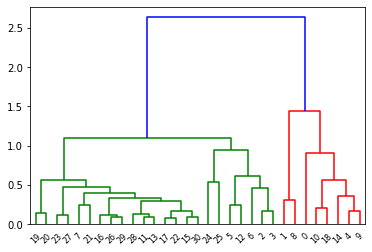

In [26]:
model = AgglomerativeClustering(linkage='ward', n_clusters=4)
y = model.fit_predict(train_x)
print(y)
linkage_matrix = ward(train_x)
dendrogram(linkage_matrix)
plt.show()